In [4]:
import librosa
import numpy as np
from IPython.display import Audio
import librosa.display
import matplotlib.pyplot as plt

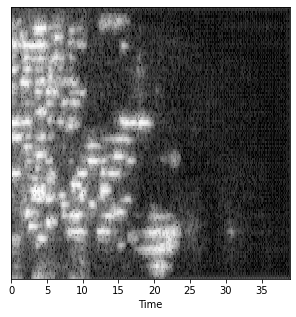

In [24]:
sample = np.load("output-arrays/generated_232_0.npy")
des = np.zeros([128, 312], dtype=np.complex64)

for i in range(len(sample)):
    for k in range(len(sample[0])):
        des[i][k] = complex(sample[i][k][0], sample[i][k][1])

res = librosa.istft(des)

# convert the slices to amplitude
sgram_db = librosa.amplitude_to_db(abs(des))

_, ax = plt.subplots(figsize=(5, 5))

librosa.display.specshow(sgram_db, sr=4096, x_axis='time',  ax=ax, cmap='gray')


# We'll need IPython.display's Audio widget
from IPython.display import Audio

Audio(data=res, rate=4096)
